<a href="https://colab.research.google.com/github/amit8687/try_on_new/blob/main/try_on_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vastra - Visual Clothing Try On.
---
Demo for Virtual Try On


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Setup

- **It will take few minutes to finish installation**

In [13]:
# clone repository
%cd /content/drive/MyDrive
!git clone https://github.com/rishabh-s-t/Vastra-Final

# install dependencies
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

#%cd Vastra-Final
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

/content/drive/MyDrive
Cloning into 'Vastra-Final'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 222 (delta 50), reused 75 (delta 28), pack-reused 102 (from 1)
Receiving objects: 100% (222/222), 27.03 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Updating files: 100% (133/133), done.
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not

In [14]:
%cd /content/drive/MyDrive/Vastra-Final
!git clone https://github.com/facebookresearch/detectron2.git
!python -m pip install -e detectron2

/content/drive/MyDrive/Vastra-Final
Cloning into 'detectron2'...
remote: Enumerating objects: 15837, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 15837 (delta 29), reused 12 (delta 12), pack-reused 15783 (from 3)
Receiving objects: 100% (15837/15837), 6.40 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (11536/11536), done.
Updating files: 100% (827/827), done.
Obtaining file:///content/drive/MyDrive/Vastra-Final/detectron2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


# 2. Download Pre-trained Models

In [15]:
!pip install --upgrade --no-cache-dir gdown

%cd /content/drive/MyDrive/Vastra-Final/HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd /content/drive/MyDrive/Vastra-Final/Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

/content/drive/MyDrive/Vastra-Final/HR-VITON-main
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/u/0/uc?id=1BkSA8UJo-6eOkKcXTFOHK80Esc4vBmVC

but Gdown can't. Please check connections and permissions.
Downloading...
From (original): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=e1fc792a-4a69-4db8-b506-0351f5f5a857
To: /content/drive/MyDrive/Vastra-Final/HR-VITON-main/mtviton.pth
100% 190M/190M [00:02<00:00, 92.3MB/s]
/content/drive/MyDrive/Vastra-Final
/content/drive/MyDrive/Vastra-Final/Graphonomy-master
Downloading...
From (original): https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_s

In [14]:
%cd ./Vastra-Final
!git clone https://github.com/facebookresearch/detectron2.git

[Errno 2] No such file or directory: './Vastra-Final'
/content/Vastra-Final
fatal: destination path 'detectron2' already exists and is not an empty directory.


# 3. Upload Cloth Images
Either use sample images or upload other cloth images

In [19]:
import os
import shutil
from google.colab import files

# Uncomment the following block if you would like to upload your own cloth images.
# Make sure the input image does not have the name = 'cloth_web.jpg' otherwise the script will crash
input_dir = '/content/drive/MyDrive/Vastra-Final/static/'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)

try:
  os.remove(input_dir+'/cloth_web.jpg')
  os.rename(input_path, input_dir+'/cloth_web.jpg')
except Exception as e:
  print(str(e))


Saving 04_dress.png to 04_dress.png


# 4. Upload Person Images
Either use sample images or upload your images

In [20]:
# Uncomment the following block if you would like to upload your own images.
# Make sure the input image does not have the name = 'origin_web.jpg' otherwise the script will crash


input_dir = '/content/drive/MyDrive/Vastra-Final/static/'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
try:
  #os.remove(input_dir+'/origin_web.jpg')
  os.rename(input_path, input_dir+'/origin_web.jpg')
except Exception as e:
  print(str(e))


Saving 004.jpg to 004.jpg


# 5. Check Images
check image uploaded successfully

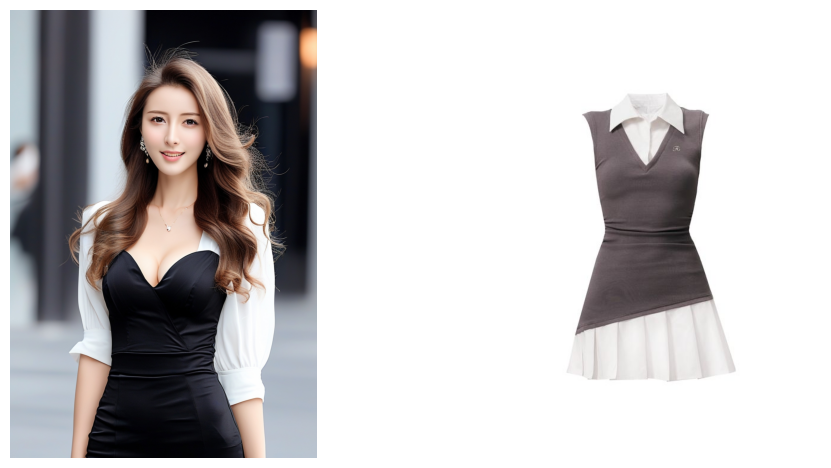

In [34]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Vastra-Final/static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Vastra-Final/static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE
* It will take less than 2 minute
* you can remove background using --background False




In [5]:
!python /content/drive/MyDrive/Vastra-Final/main.py --background False

Traceback (most recent call last):
  File "/content/drive/MyDrive/Vastra-Final/main.py", line 8, in <module>
    from cloths_segmentation.pre_trained_models import create_model
ModuleNotFoundError: No module named 'cloths_segmentation'


In [4]:
import torch

# Check if CUDA (GPU) is available
cuda_available = torch.cuda.is_available()
print("CUDA Available: ", cuda_available)

# If CUDA is available, print GPU details
if cuda_available:
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory Allocated: {torch.cuda.memory_allocated(0)} bytes")
    print(f"GPU Memory Cached: {torch.cuda.memory_reserved(0)} bytes")
else:
    print("No GPU detected.")


CUDA Available:  False
No GPU detected.


In [2]:
!pip install torch torchvision torchaudio

# 7. View Results

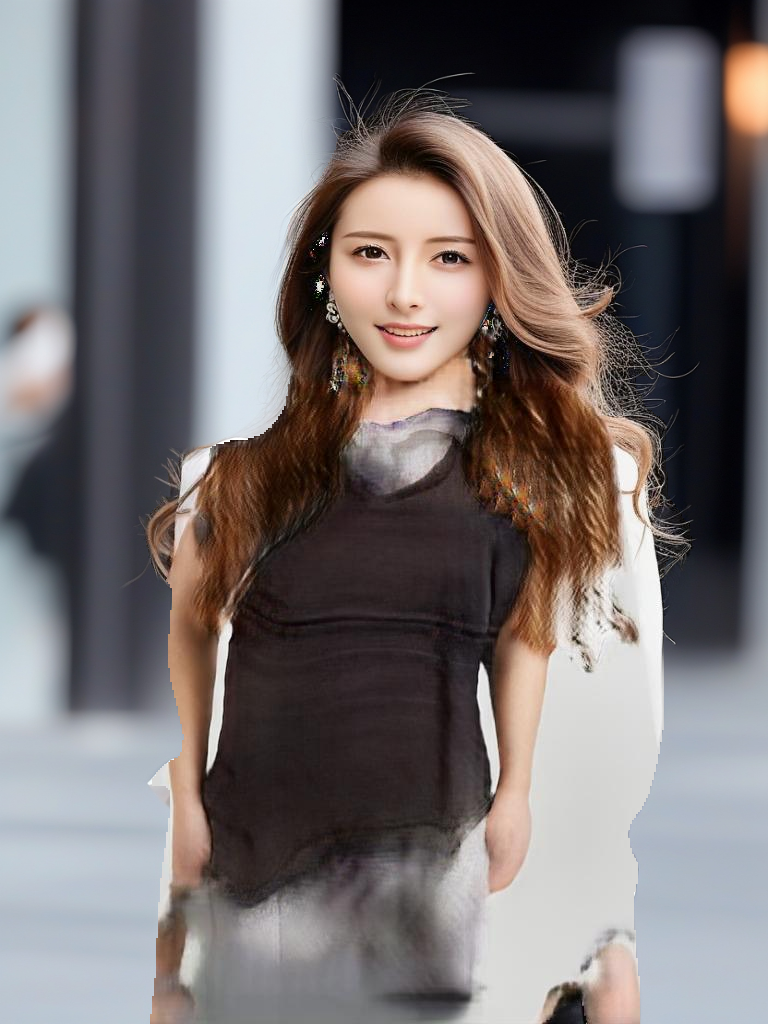

In [35]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)